    Question: 
How many O-rings does the model predict will show erosion or blowby when the temperature is 31 degrees F? (We don’t know how much pressure the rings will experience at liftoff so do predictions at 0,50, 100 and 200 PSI to see what difference it makes.)

    Answer: 
NumberOfErosionRings = 3.3298 +0.0029*PSI-0.0487*Temperature
The predicted number of erosion O-rings are 1.8201, 1.9651,2.1101,2.4001. 

In [59]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices


In [51]:
df1=pd.ExcelFile("o-ring-erosion-or-blowby.xlsx")

In [55]:
df = pd.io.excel.read_excel('o-ring-erosion-or-blowby.xlsx',header=None)

In [56]:
df[0:2]


,0,1,2,3,4
0,6,0,66,50,1
1,6,1,70,50,2


In [27]:
df1 = pd.DataFrame(df,columns=
                ['RiskRing','ThermalDistress','Degree','Pressure','TempOrder'])

In [28]:
df1[0:2]

,RiskRing,ThermalDistress,Degree,Pressure,TempOrder
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN


In [57]:
#below will replace first line with header
df.columns=['RiskRing','ThermalDistress','Degree','Pressure','TempOrder']
#df.columns.append['a','b','c','d','e']
#df.columns = pd.MultiIndex.from_tuples(zip(['RiskRing','ThermalDistress','Degree','Pressure','TempOrder'],df.columns))
#df.reset_index(inplace=True)
df[:3]

,RiskRing,ThermalDistress,Degree,Pressure,TempOrder
0,6,0,66,50,1
1,6,1,70,50,2
2,6,0,69,50,3


In [60]:
results = smf.ols('ThermalDistress ~ Degree + Pressure', data=df).fit()

In [61]:
print results.summary()

                            OLS Regression Results                            
Dep. Variable:        ThermalDistress   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     5.490
Date:                Sun, 14 Jun 2015   Prob (F-statistic):             0.0126
Time:                        15:59:31   Log-Likelihood:                -17.408
No. Observations:                  23   AIC:                             40.82
Df Residuals:                      20   BIC:                             44.22
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      3.3298      1.188      2.803      0.0

In [69]:
for i in [0,50,100,200]:
    print 3.3298+0.0029*i-0.0487*31

1.8201
1.9651
2.1101
2.4001


In [70]:
from mpl_toolkits.mplot3d import Axes3D

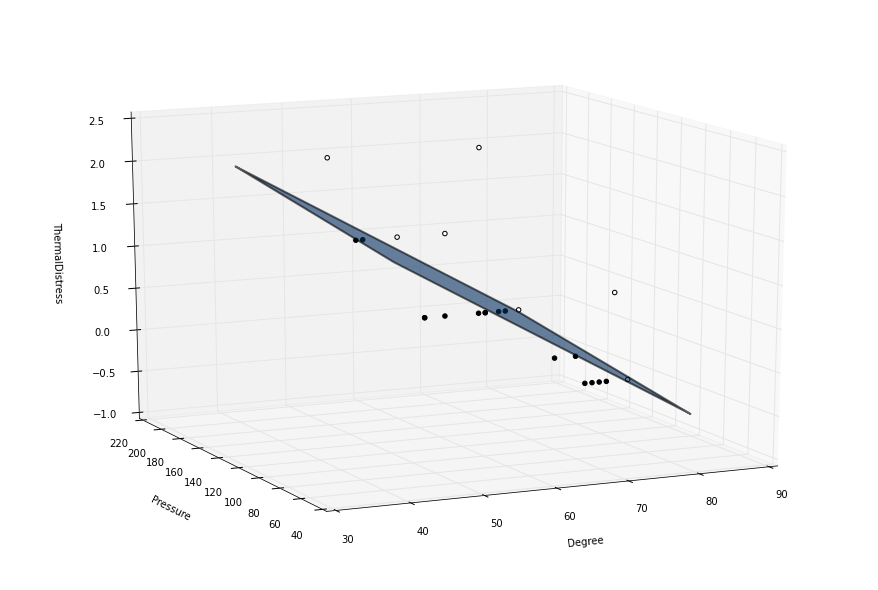

In [86]:
X = df[['Degree', 'Pressure']]
y = df['ThermalDistress']
X = sm.add_constant(X)
est = sm.OLS(y,X).fit()
xx1,xx2 = np.meshgrid(np.linspace(40,X.Degree.max(),10),np.linspace(X.Pressure.min(),X.Pressure.max(),10))
Z = est.params[0] + est.params[1]*xx1 + est.params[2]*xx2

fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig,azim=-115,elev=15)
surf = ax.plot_surface(xx1,xx2,Z,cmap=plt.cm.RdBu_r,alpha=0.6,linewidth=2)
resid = y - est.predict(X)
ax.scatter(X[resid >= 0].Degree, X[resid >= 0].Pressure, y[resid >= 0], color='black', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0].Degree, X[resid < 0].Pressure, y[resid < 0], color='black', alpha=1.0)

ax.set_xlabel('Degree')
ax.set_ylabel('Pressure')
ax.set_zlabel('ThermalDistress')
